In [0]:
!pip install seaborn==0.9.0

In [0]:
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [0]:
df = pd.read_csv('proteinGroups.txt', sep="\t")

In [0]:
lfq_df = df.set_index("Protein IDs", drop = False)


#List of complexes to check
BRCA1_complex = ['O60934', 'P49959', 'Q92878']

lfq_df = lfq_df.loc[BRCA1_complex,"LFQ intensity 01OV007":"LFQ intensity 17OV026"]

In [0]:
arrayCancer = []

#These are the proposed non cancerous id's?
arrayNonCancer = ['LFQ intensity 01OV029', 'LFQ intensity 02OV001_NM', 
                     'LFQ intensity 11OV002_NM', 'LFQ intensity 11OV010_NM', 'LFQ intensity 14OV029_NM']

#Create Cancer Array
for col in lfq_df:
  if(col not in arrayNonCancer):
    if '_NM' not in col:
      arrayCancer.append(col)
    else:
      arrayNonCancer.append(col)  

#Create 3 nonCancer arrays for each protein
nonCancer_O60934 = []
nonCancer_P49959 = []
nonCancer_Q92878 = []

#Create 3 cancer arrays for each protein
cancer_O60934 = []
cancer_P49959 = []
cancer_Q92878 = []

#Created these three for the transform..
ultimate_value_array = []
ultimate_name_array = []
ultimate_canc_nonCanc_array = []

#------------------------------------------
for i in lfq_df.loc['P49959', arrayCancer]:
  ultimate_value_array.append(i)
  ultimate_name_array.append('P49959')
  ultimate_canc_nonCanc_array.append('Yes')
  cancer_P49959.append(i)
  
for i in lfq_df.loc['P49959', arrayNonCancer]:
  ultimate_value_array.append(i)
  ultimate_name_array.append('P49959_nc')
  ultimate_canc_nonCanc_array.append('No')
  nonCancer_P49959.append(i)
#------------------------------------------

#------------------------------------------  
for i in lfq_df.loc['Q92878', arrayCancer]:
  ultimate_value_array.append(i)
  ultimate_name_array.append('Q92878')
  ultimate_canc_nonCanc_array.append('Yes')
  cancer_Q92878.append(i)
  
for i in lfq_df.loc['Q92878', arrayNonCancer]:
  ultimate_value_array.append(i)
  ultimate_name_array.append('Q92878_nc')
  ultimate_canc_nonCanc_array.append('No')
  nonCancer_Q92878.append(i)
#------------------------------------------

In [0]:
pca = PCA(n_components=2)

#Scatter plot for log transforms
lfq_non_cancerous_df = lfq_df.loc[BRCA1_complex,arrayNonCancer]
lfq_cancerous_df = lfq_df.loc[BRCA1_complex,arrayCancer]

pcs_log_non_cancerous_df = pd.DataFrame(pca.fit_transform(((lfq_non_cancerous_df + 1) + 1).apply(np.log)))
pcs_log_cancerous_df = pd.DataFrame(pca.fit_transform(((lfq_cancerous_df + 1) + 1).apply(np.log)))

log_data_non_cancerous = sns.scatterplot(x=0, y=1, data=pcs_log_non_cancerous_df)
log_data_cancerous = sns.scatterplot(x=0, y=1, data=pcs_log_cancerous_df)

#Scatter plot for non_log transforms
lfq_non_cancerous_df = lfq_df.loc[BRCA1_complex,arrayNonCancer]
lfq_cancerous_df = lfq_df.loc[BRCA1_complex,arrayCancer]

pcs_non_log_non_cancerous = pd.DataFrame(pca.fit_transform((lfq_non_cancerous_df + 1)))
pcs_non_log_cancerous = pd.DataFrame(pca.fit_transform((lfq_cancerous_df + 1)))

non_log_data_non_cancerous = sns.scatterplot(x=0, y=1, data=pcs_non_log_non_cancerous)
non_log_data_cancerous = sns.scatterplot(x=0, y=1, data=pcs_non_log_cancerous)

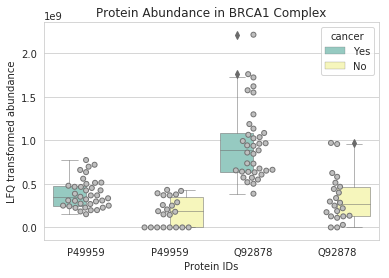

In [0]:
# Set theme
sns.set_style('whitegrid')

ultimate = {'cancer': ultimate_canc_nonCanc_array,
            'Protein IDs': ultimate_name_array,
             'LFQ transformed abundance': ultimate_value_array}

df_ultimate = pd.DataFrame(data = ultimate)
df_ultimate = df_ultimate.set_index("cancer", drop = False)
ax = sns.boxplot(x = "Protein IDs", y = "LFQ transformed abundance", data = df_ultimate, 
                 hue = 'cancer', palette="Set3", linewidth=.5)

ax = sns.swarmplot(x = "Protein IDs", y = "LFQ transformed abundance", data = df_ultimate, 
                 color=".75", linewidth=1)

ax.set_title('Protein Abundance in BRCA1 Complex')
br = ax.set_xticklabels(['P49959', 'P49959', 'Q92878', 'Q92878'])

### caption:
Figure 1. Protein abundances for two of the four members of the BRCA1 complex. 